# "2019 May Portfolio BackTest"
> "2019 May portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [20]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [21]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20194dayreturnpred2019train60K.csv')

In [22]:
#hide_input
df_testp=df_testp[['Company Name','Date', 'Ticker', 'label',  'pred', 'prof0.0', 'prof-1.0',
       'prof1.0', 'return1&2', 'return1&2&3', 'return1&2&3&4', 'return2',
       'return1', 'return3', 'return4', 'cumulative_return1',
       'cumulative_return1&2', 'cumulative_return1&2&3',
       'cumulative_return1&2&3&4']].copy()

In [23]:
#hide
import datetime
datetoday=f"{datetime.datetime.now():%Y%m%d}"
dateyesterday=int(datetoday)-6;dateyesterday

20200423

In [24]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20190501].loc[df_testp.Date<20190601].sort_values(by='Date',ascending=True).copy().reset_index()

**Long-Short Portfolio**

In [25]:
#hide
#df_testp=df_testp.loc[df_testp.Date>=20200201].copy().reset_index()
df_testp['indexx']=range(len(df_testp))

In [26]:
#hide
df_testp['cumulative_return1']=0.0
df_testp['cumulative_return1&2']=0.0
df_testp['cumulative_return1&2&3']=0.0
df_testp['cumulative_return1&2&3&4']=0.0
for l in range(len(df_testp)):
  df_testp['cumulative_return1'][l]=np.prod(df_testp['return1'][:l])
  df_testp['cumulative_return1&2'][l]=np.prod(df_testp['return1&2'][:l])
  df_testp['cumulative_return1&2&3'][l]=np.prod(df_testp['return1&2&3'][:l])
  df_testp['cumulative_return1&2&3&4'][l]=np.prod(df_testp['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [27]:
#hide_input
df_testp

,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,return1&2,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,2342,CalAmp Corp.,20190501,CAMP,-1.0,1.0,0.140381,0.355808,0.503811,1.000000,...,0.972143,1.013025,0.987143,1.003571,0.968683,1.000000,1.000000,1.000000,1.000000,0
1,2343,VIRCO MFG CORPORATION,20190501,VIRC,-1.0,1.0,0.131993,0.354264,0.513743,0.997555,...,0.968215,1.022556,0.975550,0.992647,0.977778,0.987143,1.000000,1.003571,0.972143,1
2,2344,NVE CORP /NEW/,20190501,NVEC,-1.0,1.0,0.137102,0.391227,0.471670,0.946000,...,0.929789,1.004022,0.942211,1.012574,0.970659,0.963007,0.997555,0.993757,0.941243,2
3,2345,COMMVAULT SYSTEMS INC,20190502,CVLT,-1.0,1.0,0.119628,0.403311,0.477060,1.017011,...,0.964067,1.006812,1.010130,0.971434,0.975817,0.907356,0.943687,0.951914,0.875158,3
4,2346,Francesca's Holdings CORP,20190503,FRAN,-1.0,1.0,0.116914,0.332339,0.550747,0.969231,...,0.938462,0.984375,0.984615,0.968254,1.000000,0.916547,0.959740,0.940452,0.843711,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2415,WESTELL TECHNOLOGIES INC,20190531,WSTL,-1.0,1.0,0.118069,0.374710,0.507220,0.960452,...,0.954802,0.994152,0.966102,1.000000,0.994118,0.742799,0.455565,0.419717,0.038602,70
71,2412,CSS INDUSTRIES INC,20190531,CSS,-1.0,1.0,0.153856,0.343470,0.502674,0.985263,...,0.926316,1.028571,0.957895,0.918803,1.023256,0.717619,0.437548,0.403118,0.036857,71
72,2413,Arizona Gold & Onyx Mining Co,20190531,VGCP,-1.0,1.0,0.146126,0.400070,0.453804,0.705882,...,0.776471,0.705882,1.000000,1.000000,1.100000,0.687404,0.431100,0.364928,0.034141,72
73,2414,ECOLOGY & ENVIRONMENT INC,20190531,EEI,-1.0,1.0,0.176216,0.306914,0.516870,0.974752,...,0.978359,1.000000,0.974752,1.003700,1.000000,0.687404,0.304306,0.257596,0.026510,73


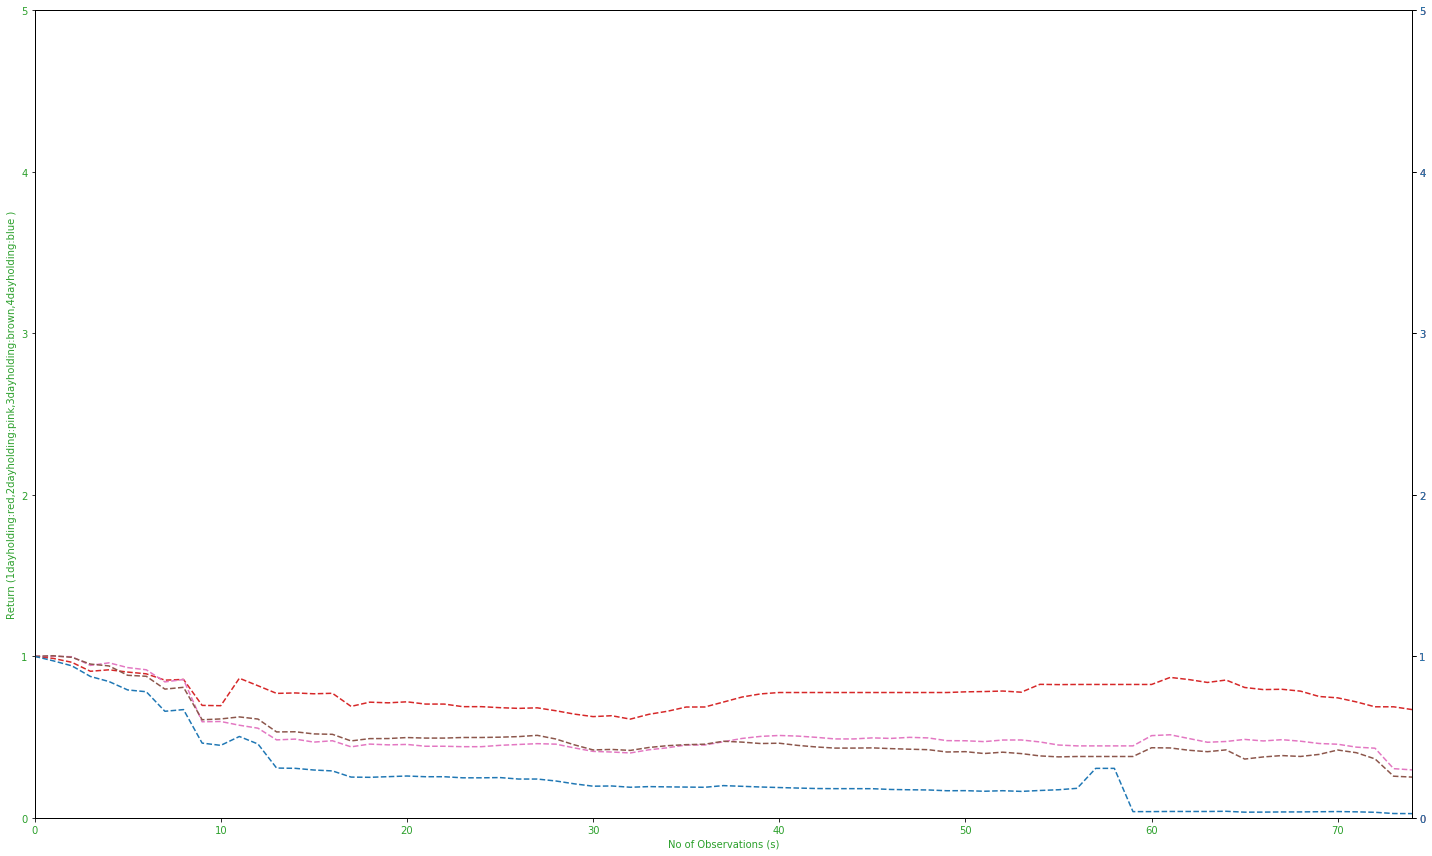

In [28]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_testp['indexx'], df_testp['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_testp['indexx'], df_testp['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_testp['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)


fig.tight_layout()

**Long portfolio**

In [29]:
#hide_input
df_long=df_testp.copy()
df_long=df_long.loc[df_long.pred==1.0].sort_values(by='Date',ascending=True).reset_index()


In [30]:
#hide_input
df_long['indexx']=range(len(df_long))

In [31]:
#hide
df_long['cumulative_return1']=0.0
df_long['cumulative_return1&2']=0.0
df_long['cumulative_return1&2&3']=0.0
df_long['cumulative_return1&2&3&4']=0.0
for l in range(len(df_long)):
  df_long['cumulative_return1'][l]=np.prod(df_long['return1'][:l])
  df_long['cumulative_return1&2'][l]=np.prod(df_long['return1&2'][:l])
  df_long['cumulative_return1&2&3'][l]=np.prod(df_long['return1&2&3'][:l])
  df_long['cumulative_return1&2&3&4'][l]=np.prod(df_long['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [32]:
#hide_input
df_long

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,0,2342,CalAmp Corp.,20190501,CAMP,-1.0,1.0,0.140381,0.355808,0.503811,...,0.972143,1.013025,0.987143,1.003571,0.968683,1.000000,1.000000,1.000000,1.000000,0
1,1,2343,VIRCO MFG CORPORATION,20190501,VIRC,-1.0,1.0,0.131993,0.354264,0.513743,...,0.968215,1.022556,0.975550,0.992647,0.977778,0.987143,1.000000,1.003571,0.972143,1
2,2,2344,NVE CORP /NEW/,20190501,NVEC,-1.0,1.0,0.137102,0.391227,0.471670,...,0.929789,1.004022,0.942211,1.012574,0.970659,0.963007,0.997555,0.993757,0.941243,2
3,3,2345,COMMVAULT SYSTEMS INC,20190502,CVLT,-1.0,1.0,0.119628,0.403311,0.477060,...,0.964067,1.006812,1.010130,0.971434,0.975817,0.907356,0.943687,0.951914,0.875158,3
4,4,2346,Francesca's Holdings CORP,20190503,FRAN,-1.0,1.0,0.116914,0.332339,0.550747,...,0.938462,0.984375,0.984615,0.968254,1.000000,0.916547,0.959740,0.940452,0.843711,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,72,2413,Arizona Gold & Onyx Mining Co,20190531,VGCP,-1.0,1.0,0.146126,0.400070,0.453804,...,0.776471,0.705882,1.000000,1.000000,1.100000,0.742799,0.455565,0.419717,0.308813,69
70,73,2414,ECOLOGY & ENVIRONMENT INC,20190531,EEI,-1.0,1.0,0.176216,0.306914,0.516870,...,0.978359,1.000000,0.974752,1.003700,1.000000,0.742799,0.321575,0.296271,0.239785,70
71,70,2415,WESTELL TECHNOLOGIES INC,20190531,WSTL,-1.0,1.0,0.118069,0.374710,0.507220,...,0.954802,0.994152,0.966102,1.000000,0.994118,0.724045,0.313456,0.289859,0.234595,71
72,71,2412,CSS INDUSTRIES INC,20190531,CSS,-1.0,1.0,0.153856,0.343470,0.502674,...,0.926316,1.028571,0.957895,0.918803,1.023256,0.699501,0.301060,0.278396,0.223992,72


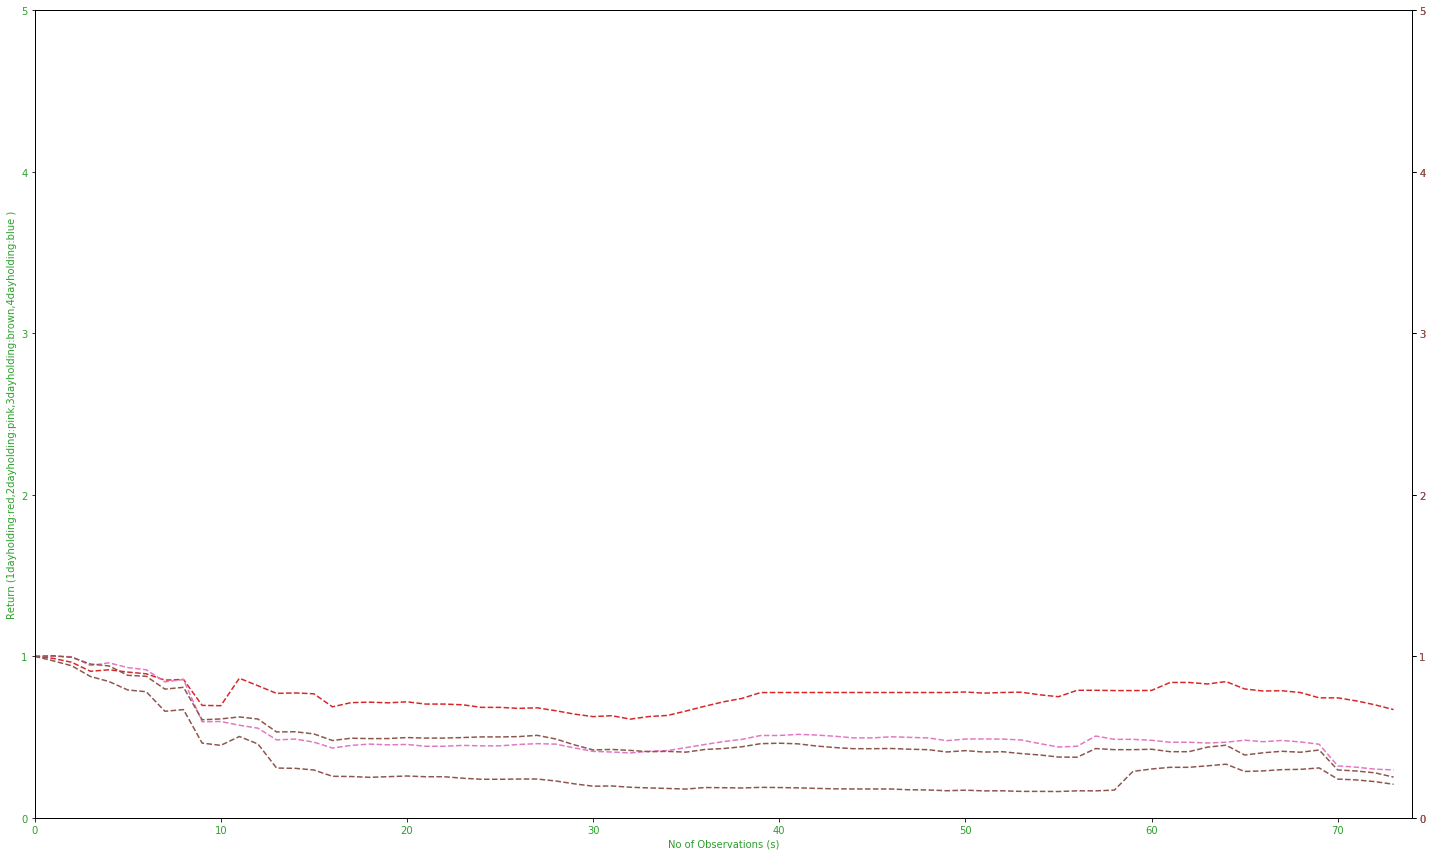

In [33]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_long['indexx'], df_long['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_long['indexx'], df_long['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_long['indexx'], df_long['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_long['indexx'], df_long['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5

a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_long['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()

**Short Portfolio**

In [34]:
#hide_input
df_short=df_testp.copy()
df_short=df_short.loc[df_short.pred==-1.0].sort_values(by='Date',ascending=True).reset_index()

In [35]:
#hide_input
df_short['indexx']=range(len(df_short))

In [36]:
#hide
df_short['cumulative_return1']=0.0
df_short['cumulative_return1&2']=0.0
df_short['cumulative_return1&2&3']=0.0
df_short['cumulative_return1&2&3&4']=0.0
for l in range(len(df_short)):
  df_short['cumulative_return1'][l]=np.prod(df_short['return1'][:l])
  df_short['cumulative_return1&2'][l]=np.prod(df_short['return1&2'][:l])
  df_short['cumulative_return1&2&3'][l]=np.prod(df_short['return1&2&3'][:l])
  df_short['cumulative_return1&2&3&4'][l]=np.prod(df_short['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [37]:
#hide_input
df_short

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,58,2397,BURZYNSKI RESEARCH INSTITUTE INC,20190529,BZYR,1.0,-1.0,0.113095,0.448391,0.438514,...,0.125,1.0,1.0,1.0,0.125,1.0,1.0,1.0,1.0,0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


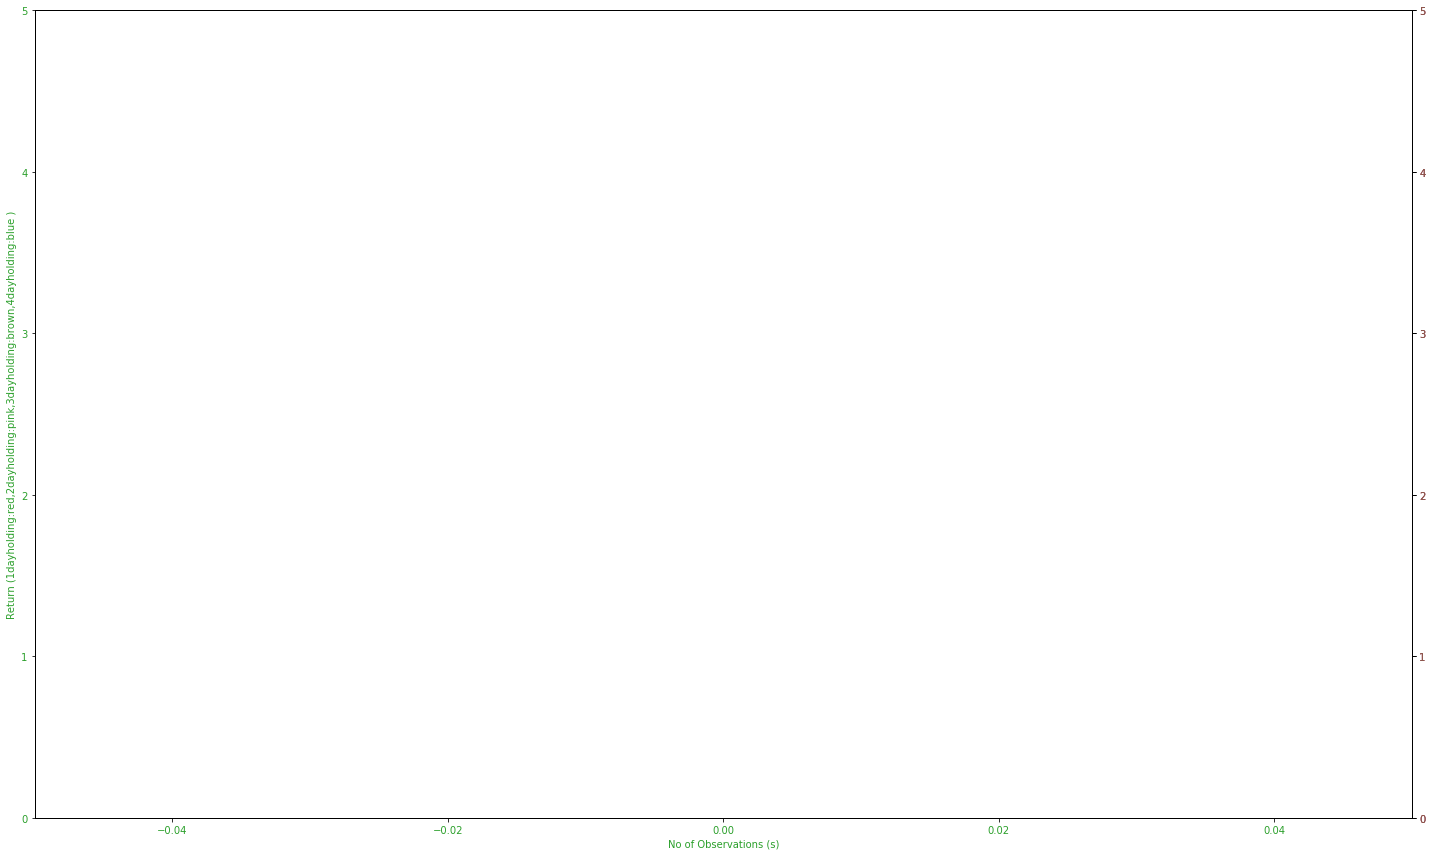

In [38]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_short['indexx'], df_short['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_short['indexx'], df_short['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_short['indexx'], df_short['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_short['indexx'], df_short['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_short['indexx'].min(),df_short['indexx'].max()
#x,y=0,10
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()